In [91]:
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import pickle

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import product, combinations
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF

# Para imputar nulos
# -------------------------------------------------------------------------
from sklearn.experimental import enable_iterative_imputer  # Habilita IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Para tratar el problema de desbalance
# -----------------------------------------------------------------------
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder #, TargetEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 

from category_encoders import TargetEncoder 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
import sys
import os
sys.path.append(os.path.abspath('../'))

In [93]:
# Insertamos los soportes de nuestro src
from src import soporte_preprocesamiento as sp
from src import soporte_encoding as se
from src import soporte_logistica_preprocesamiento as slp




In [94]:
# Instrucción para visualizar todas las columnas de un dataFrame
pd.set_option('display.max_columns', None)

In [95]:
df_datos_generales = pd.read_csv('../datos/general_data.csv')
df_survey_empleados = pd.read_csv('../datos//employee_survey_data.csv')
df_survey_managers = pd.read_csv('../datos/manager_survey_data.csv') 

In [96]:
df_datos_generales.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [97]:
df_datos_generales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [98]:
df_survey_empleados.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [99]:
df_survey_empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [100]:
df_survey_managers.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [101]:
df_survey_managers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


Los tres dataframes tienen el mismo número de filas y tiennen en común una columna llamada EmployeeID. Así que, vamos a unir los tres dataframes en uno solo tomando EmployeeID como columna común de referencia

In [102]:
df_aux = pd.merge(df_survey_empleados, df_datos_generales, on="EmployeeID", how="inner")
df = pd.merge(df_aux, df_survey_managers, on="EmployeeID", how="inner")

In [103]:
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

Vamos a convertir la Variable Respuesta Attrition en numérica.

In [105]:
diccionario_vr={"No":0,
                  "Yes":1}
df["Attrition"]=df["Attrition"].map(diccionario_vr)

Hemos unido los tres dataframes correctamente, procedemos a hacer el eda

In [106]:
sp.exploracion_datos(df)

El número de filas es 4410 y el número de columnas es 29

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


EnvironmentSatisfaction    0.566893
JobSatisfaction            0.453515
WorkLifeBalance            0.861678
NumCompaniesWorked         0.430839
TotalWorkingYears          0.204082
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
EnvironmentSatisfaction,4385.0,2.723603,1.092756,1.0,2.00,3.0,4.00,4.0
JobSatisfaction,4390.0,2.728246,1.101253,1.0,2.00,3.0,4.00,4.0
WorkLifeBalance,4372.0,2.761436,0.706245,1.0,2.00,3.0,3.00,4.0
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
Attrition,4410.0,0.161224,0.367780,0.0,0.00,0.0,0.00,1.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
BusinessTravel,4410,3,Travel_Rarely,3129
Department,4410,3,Research & Development,2883
EducationField,4410,6,Life Sciences,1818
Gender,4410,2,Male,2646
JobRole,4410,9,Sales Executive,978
MaritalStatus,4410,3,Married,2019
Over18,4410,1,Y,4410



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   int64  
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel      

None

No tenemos duplicados, pero si que tenemos nulos que tratar, en todo caso ninguna de las columnas llega al 1 por ciento de nulos.


In [107]:
# Identificamos y mostramos las columnas que toman un único valor
columnas_univalor = [col for col in df.columns if df[col].nunique() == 1]
columnas_univalor

['EmployeeCount', 'Over18', 'StandardHours']

Estas tres variables toman un único valor,  y ni que el numero de empleadores sea 1 ni el que todos sean mayores que 18 ni que el numero de horas trabajadas sea siempre 8 aporta valor al modelo predictivo por tanto eliminamos esas columnas.

"EmployeeID" nos ha servido como columna de referencia en la unión, pero a efectos del analisis predictivo es una columna irrelevante, así que la eliminamos también.

In [108]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours','EmployeeID'], inplace=True)


### VISUALIZACIÓN DE NUMÉRICAS Y CATEGÓRICAS

In [109]:
visualizador = sp.Visualizador(df)

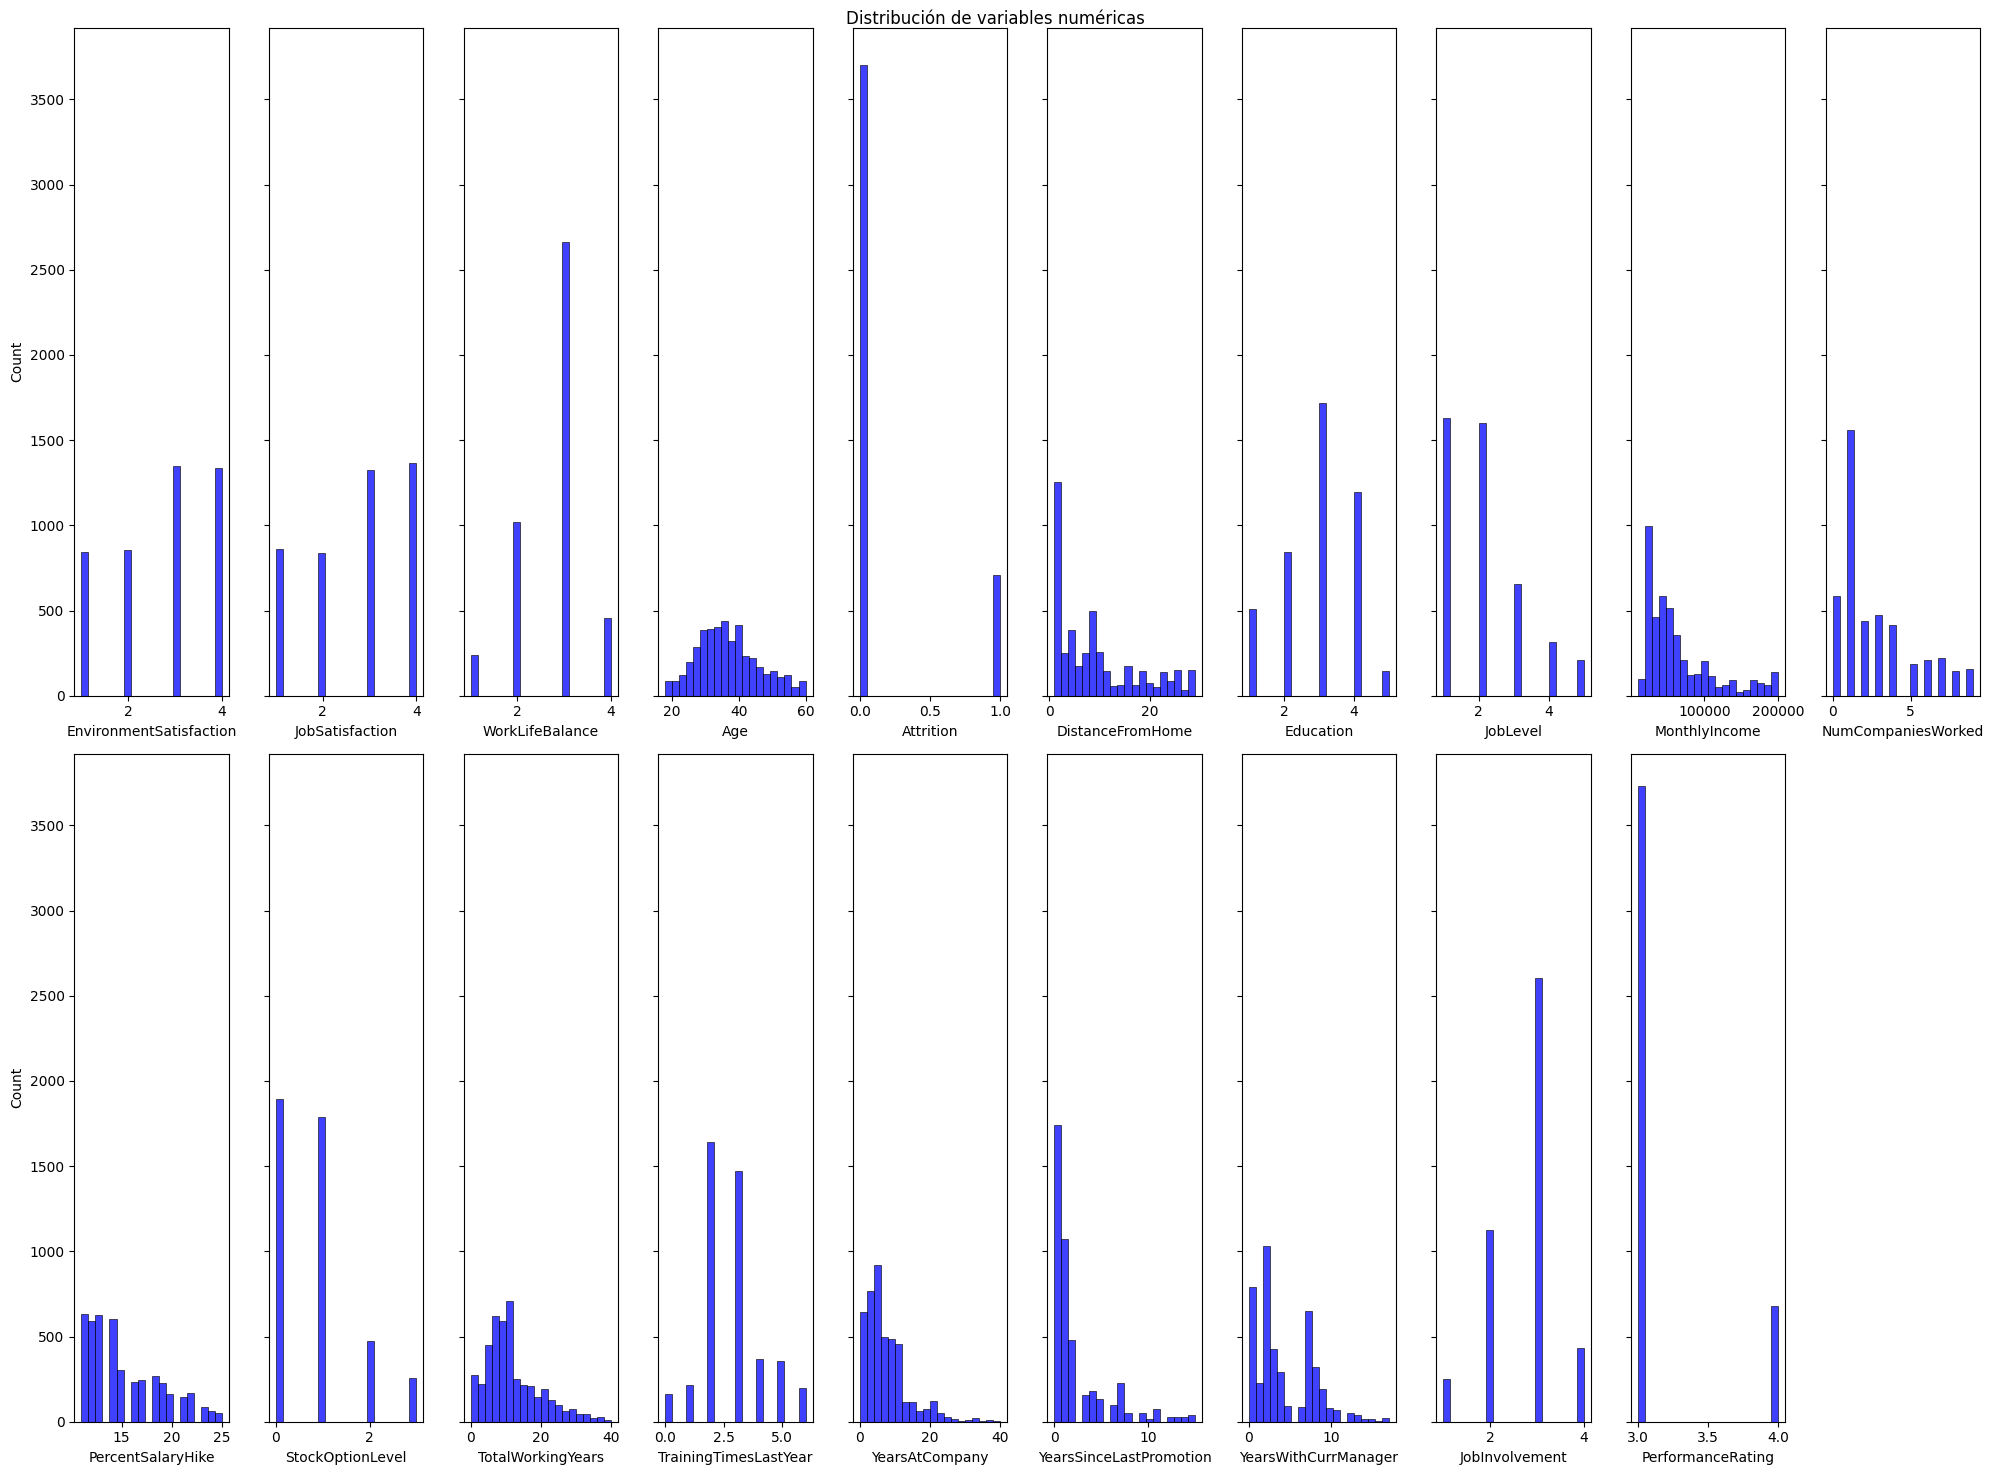

In [110]:
visualizador.plot_numericas(color="blue", tamano_grafica=(20, 15))

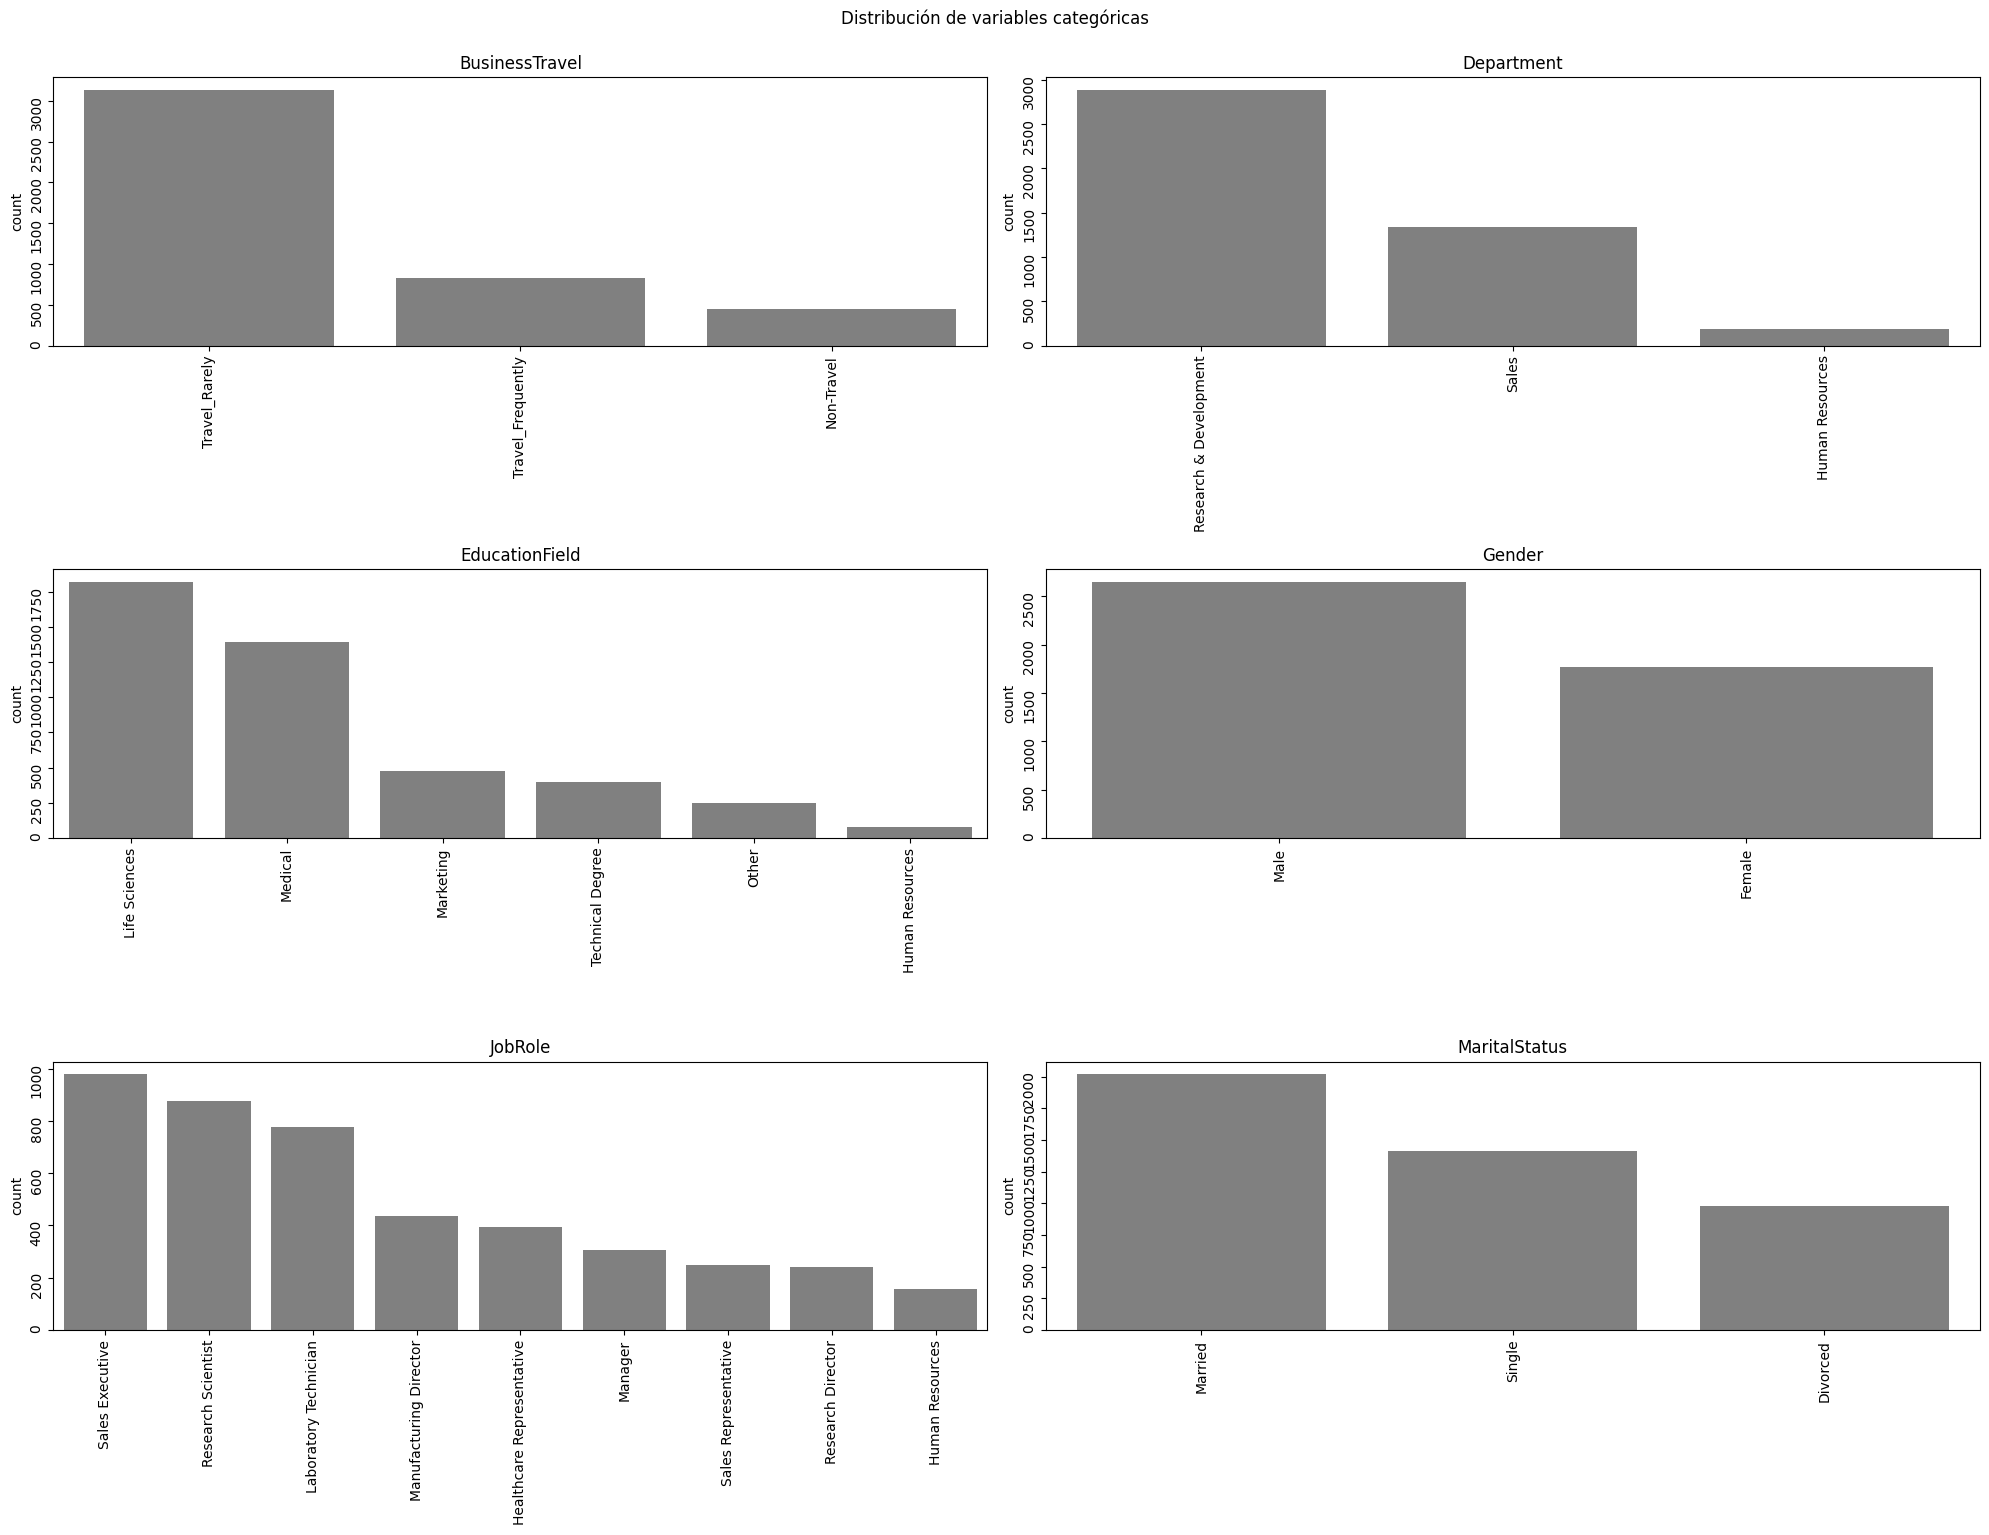

In [111]:
visualizador.plot_categoricas()

### NULOS

Tenemos 5 columnas con nulos: NumCompaniesWorked, TotalWorkingYears, EnvironmentSatisfaction, JobSatisfaction,WorkLifeBalance, vamos a imputarlas con IterativeImputer usando la mediana como estadístico.

In [112]:
df_numericas=df.select_dtypes(include=np.number)
imputer_iterative = IterativeImputer(initial_strategy='median')
iterative_imputado= imputer_iterative.fit_transform(df_numericas)
df_numericas_sin_nulos = pd.DataFrame(iterative_imputado, columns=df_numericas.columns)
df[df_numericas.columns]= df_numericas_sin_nulos

### FORMATEO DE COLUMNAS

In [113]:
columnas_a_convertir = ["Education", "JobLevel", "StockOptionLevel",
                      "TrainingTimesLastYear", "EnvironmentSatisfaction", "JobSatisfaction",
                      "WorkLifeBalance", "JobInvolvement"]

df[columnas_a_convertir] = df[columnas_a_convertir].astype('object')

Pasamos el MONTHLYINCOME de Rupias a Euros usando la tasa de conversión actual (a fecha de 29/11/2024): 1 Rupia = 0,011 EUR

In [114]:
df["MonthlyIncome"]=df["MonthlyIncome"].apply(lambda x: x * 0.011)

A la variable "Education" le mapeamos los valores de texto que vienen en diccionario-datos.


diccionario_educacion={1 :'Below College',
2 :'College',
3 :'Bachelor',
4 :'Master',
5 :'Doctor'}

df["Education"]=df["Education"].map(diccionario_educacion)

Redondeamos los valores de EnvironmentSatisfaction al entero más cercano (se generaron decimales al pasar por Iterative Imputer) y mapeamos con los valores de texto que nos indica diccionario-datos

In [115]:
df['EnvironmentSatisfaction'].round()

0       3.0
1       3.0
2       2.0
3       4.0
4       4.0
       ... 
4405    4.0
4406    4.0
4407    1.0
4408    4.0
4409    1.0
Name: EnvironmentSatisfaction, Length: 4410, dtype: object

In [116]:
diccionario_environment={1 :'Low',
2 :'Medium',
3 :'High',
4 :'Very High'}

df["EnvironmentSatisfaction"]=df["EnvironmentSatisfaction"].map(diccionario_environment)

Redondeamos TotalWorkingYears y NumCompaniesWorked para que tenga enteros como tenía antes del pasarle el Iterative Impute

In [117]:

df["TotalWorkingYears"].round()
df['NumCompaniesWorked'].round()

0       1.0
1       0.0
2       1.0
3       3.0
4       4.0
       ... 
4405    3.0
4406    2.0
4407    0.0
4408    0.0
4409    0.0
Name: NumCompaniesWorked, Length: 4410, dtype: float64

Formateamos JobInvolvement con los valores de texto de diccionario-datos

In [118]:
df["JobInvolvement"].round()

0       3.0
1       2.0
2       3.0
3       2.0
4       3.0
       ... 
4405    3.0
4406    2.0
4407    3.0
4408    2.0
4409    4.0
Name: JobInvolvement, Length: 4410, dtype: object

In [119]:
diccionario_involvement={1 :'Low',
2 :'Medium',
3 :'High',
4 :'Very High'}

df["JobInvolvement"]=df["JobInvolvement"].map(diccionario_involvement)

In [120]:
df["JobSatisfaction"].round()

0       4.0
1       2.0
2       2.0
3       4.0
4       1.0
       ... 
4405    1.0
4406    4.0
4407    3.0
4408    1.0
4409    3.0
Name: JobSatisfaction, Length: 4410, dtype: object

Hacemos lo mismo con JobSatisfaction

In [121]:
diccionario_satisfaction={1 :'Low',
2 :'Medium',
3 :'High',
4 :'Very High'}

df["JobSatisfaction"]=df["JobSatisfaction"].map(diccionario_satisfaction)

Procedemos de la misma forma con WorkLifeBalance

In [122]:
df["WorkLifeBalance"].round()

0            2.0
1            4.0
2            1.0
3            3.0
4            3.0
          ...   
4405         3.0
4406         3.0
4407         3.0
4408         3.0
4409    2.785182
Name: WorkLifeBalance, Length: 4410, dtype: object

In [123]:
diccionario_balance={1 :'Bad',
2 :'Good',
3 :'Better',
4 :'Best'}

df["WorkLifeBalance"]=df["WorkLifeBalance"].map(diccionario_balance)

Mapeamos ahora "StockOptionLevel"

In [124]:
diccionario_stock={0 :'Bad',
1 :'Good',
2 :'Better',
3 :'Best'}

df["StockOptionLevel"]=df["StockOptionLevel"].map(diccionario_stock)

Formateamos también 'JobLevel'

In [125]:
diccionario_level={1 :'Intern',
2 :'Junior',
3 :'Senior',
4 :'Manager',
5:'Head'}

df["JobLevel"]=df["JobLevel"].map(diccionario_level)

Redondeamos los valores de "NumCompaniesWorked"

In [126]:
df["NumCompaniesWorked"].round

<bound method Series.round of 0       1.0
1       0.0
2       1.0
3       3.0
4       4.0
       ... 
4405    3.0
4406    2.0
4407    0.0
4408    0.0
4409    0.0
Name: NumCompaniesWorked, Length: 4410, dtype: float64>

In [127]:
df["PerformanceRating"].unique() #DECIDIR SI SE MAPEA O NOS LA CARGAMOS

array([3., 4.])

Ahora que hemos tratado nulos y formateado variables vamos a sacr de nuevo visualizaciones de nuestras distribuciones

In [128]:
visualizador = sp.Visualizador(df)

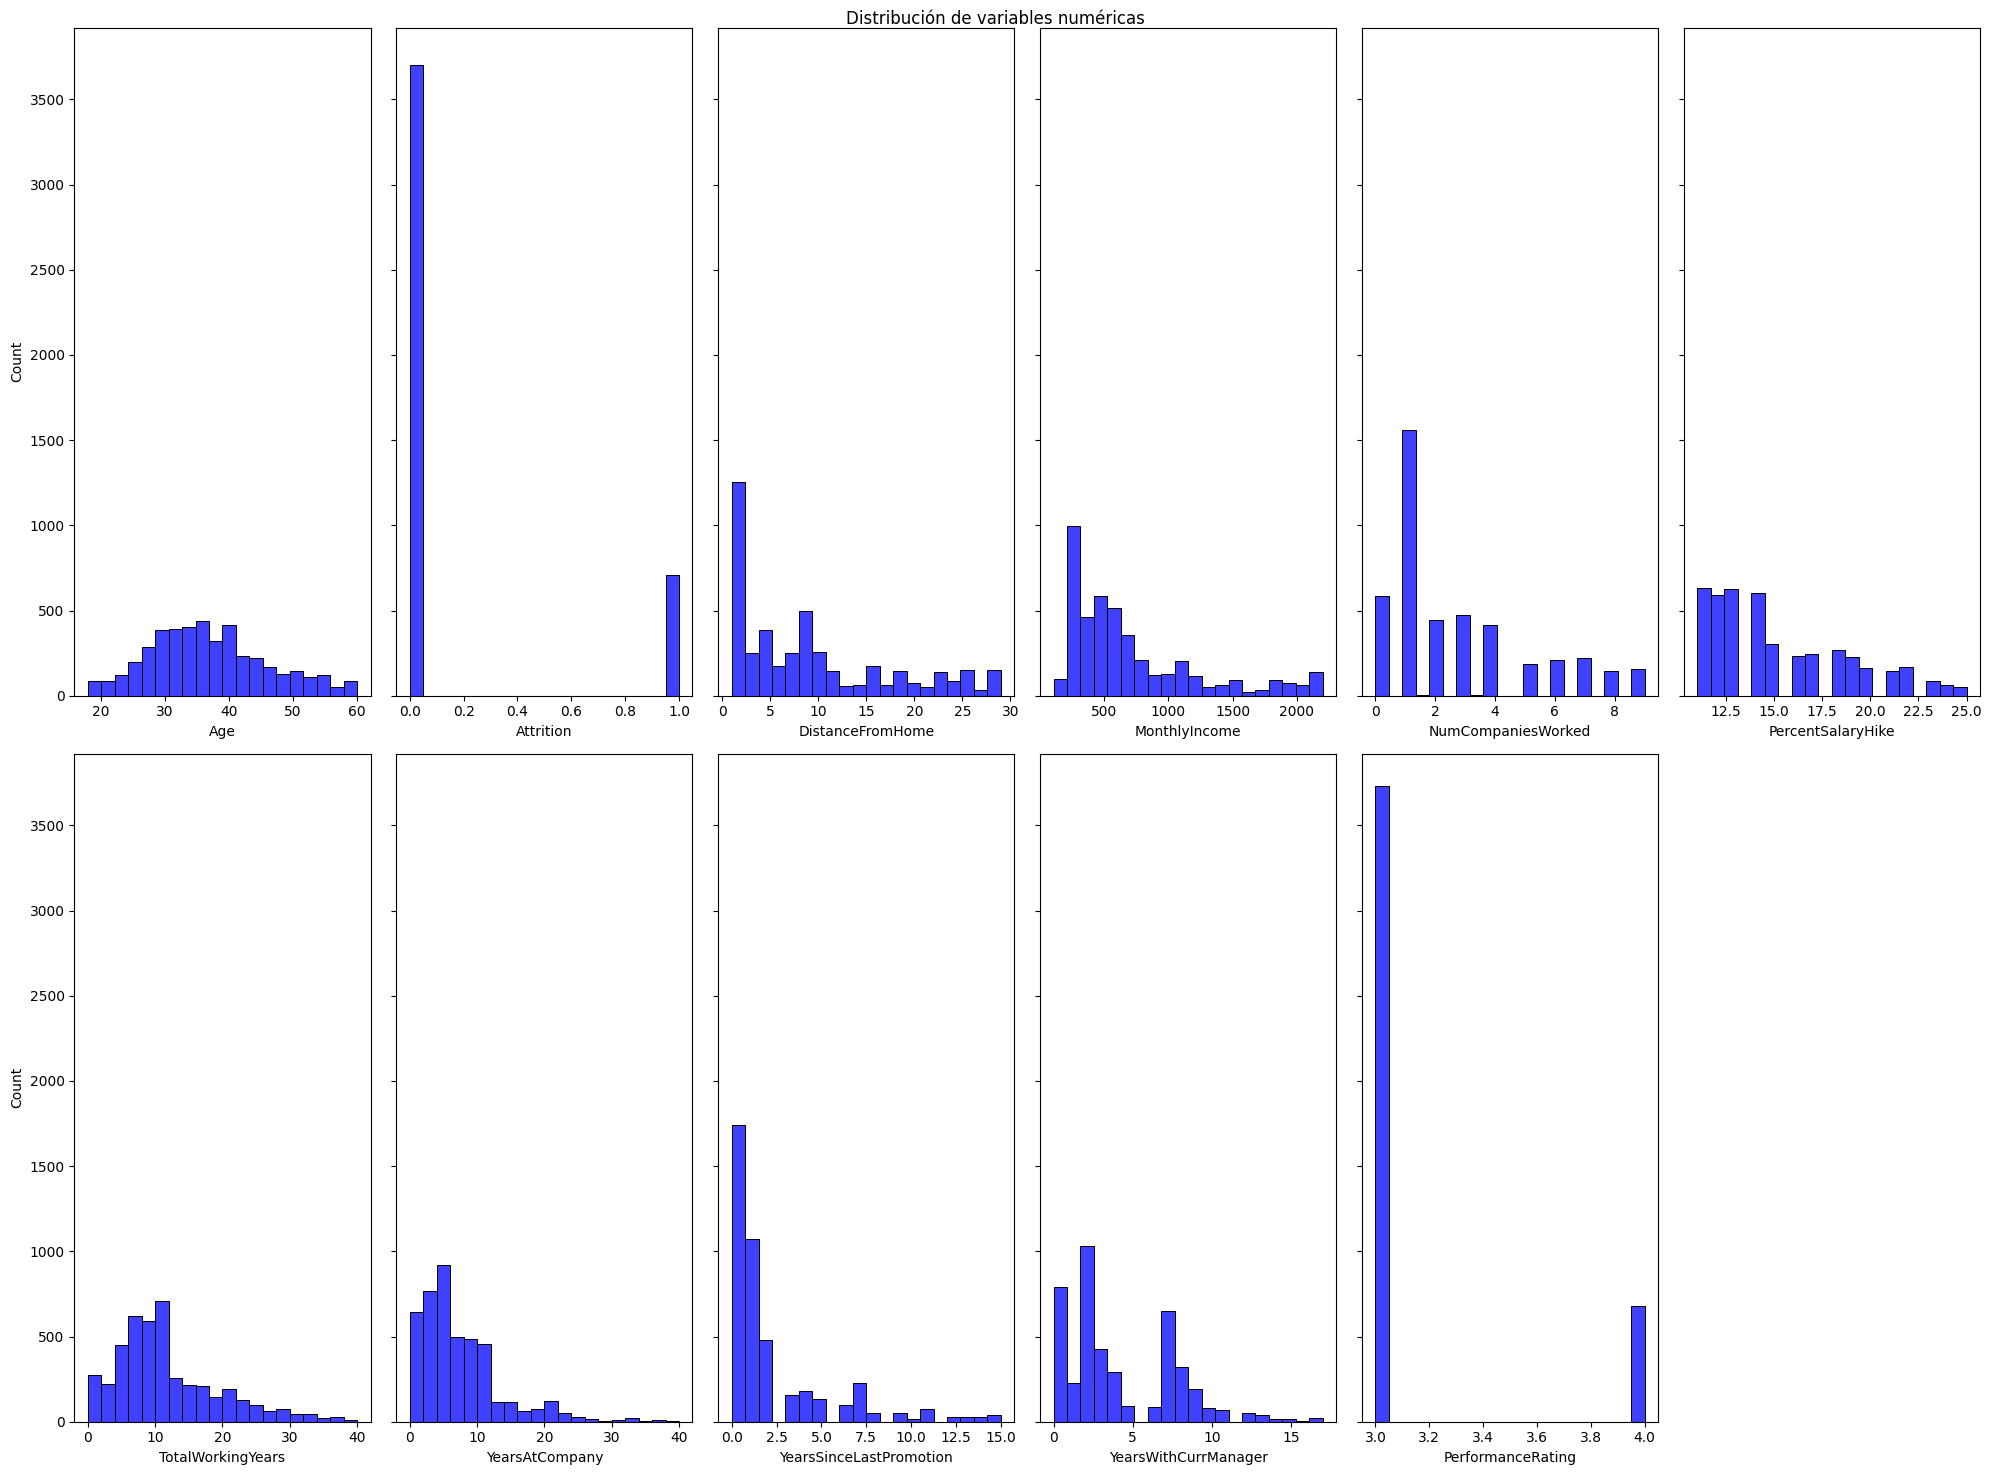

In [129]:
visualizador.plot_numericas(color="blue", tamano_grafica=(20, 15))

c:\Users\Administrador\Desktop\RCM\Proyecto8-Clasificacion\src\soporte_preprocesamiento.py:184: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


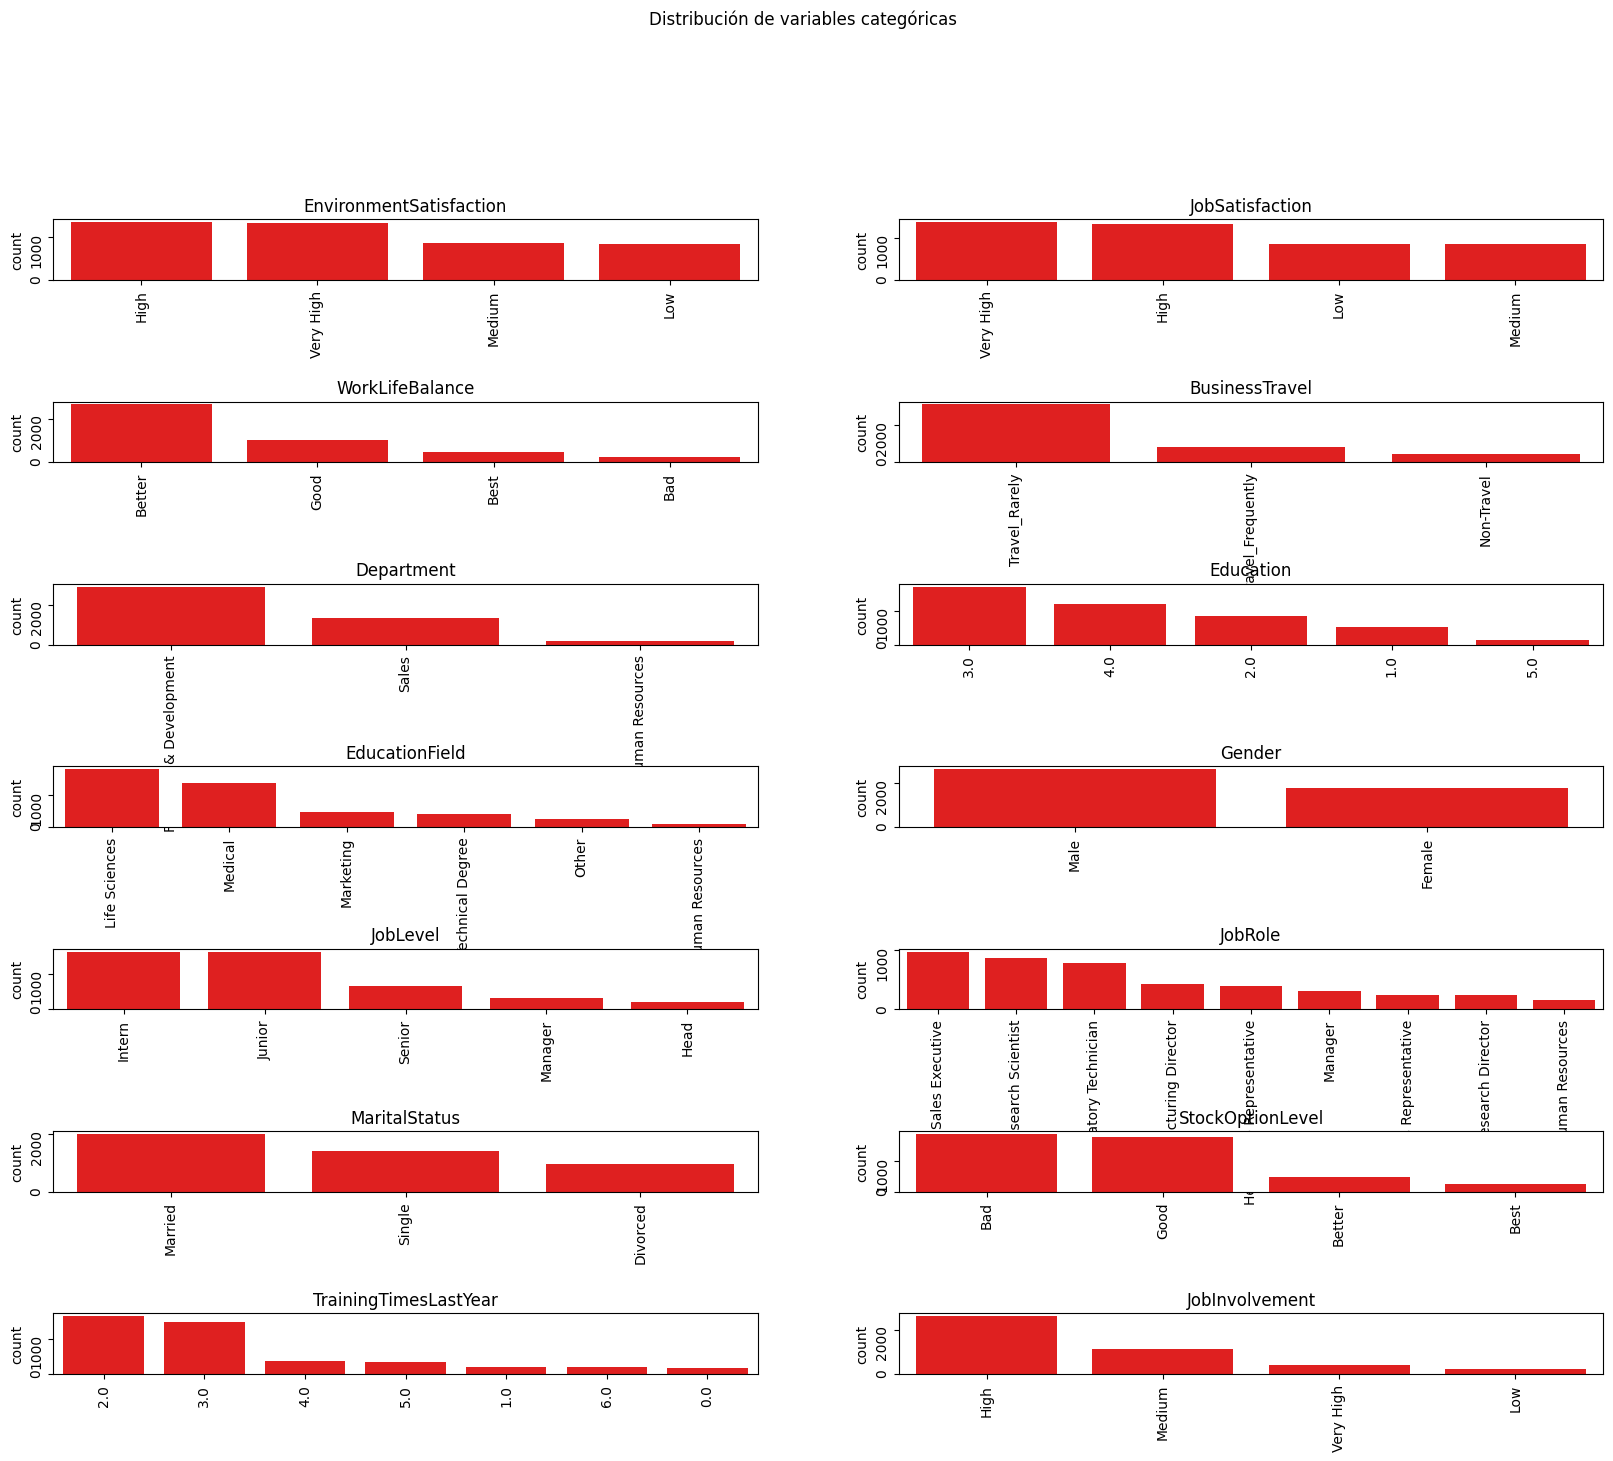

In [130]:
visualizador.plot_categoricas(color="red")

Vamos a hacer una visualización de los outliers univariados.

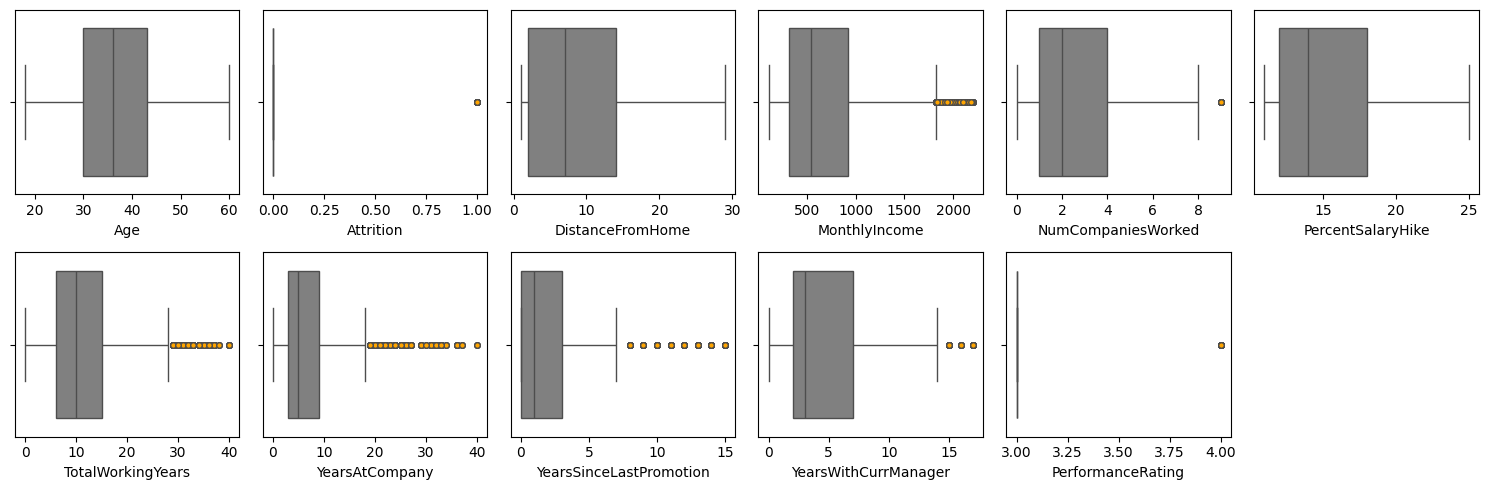

In [131]:
visualizador.deteccion_outliers()

Los outliers los tratamos con detenimiento más adelante, vemos que hay varias columnas con outliers univariados, especialmente las que hacen referencia al sueldo al numero total de años trabajados, años en la cumpania y años desde la última promoción

Vamos a visualizar la relación de las variables predictoras con la variable respuesta Attrition

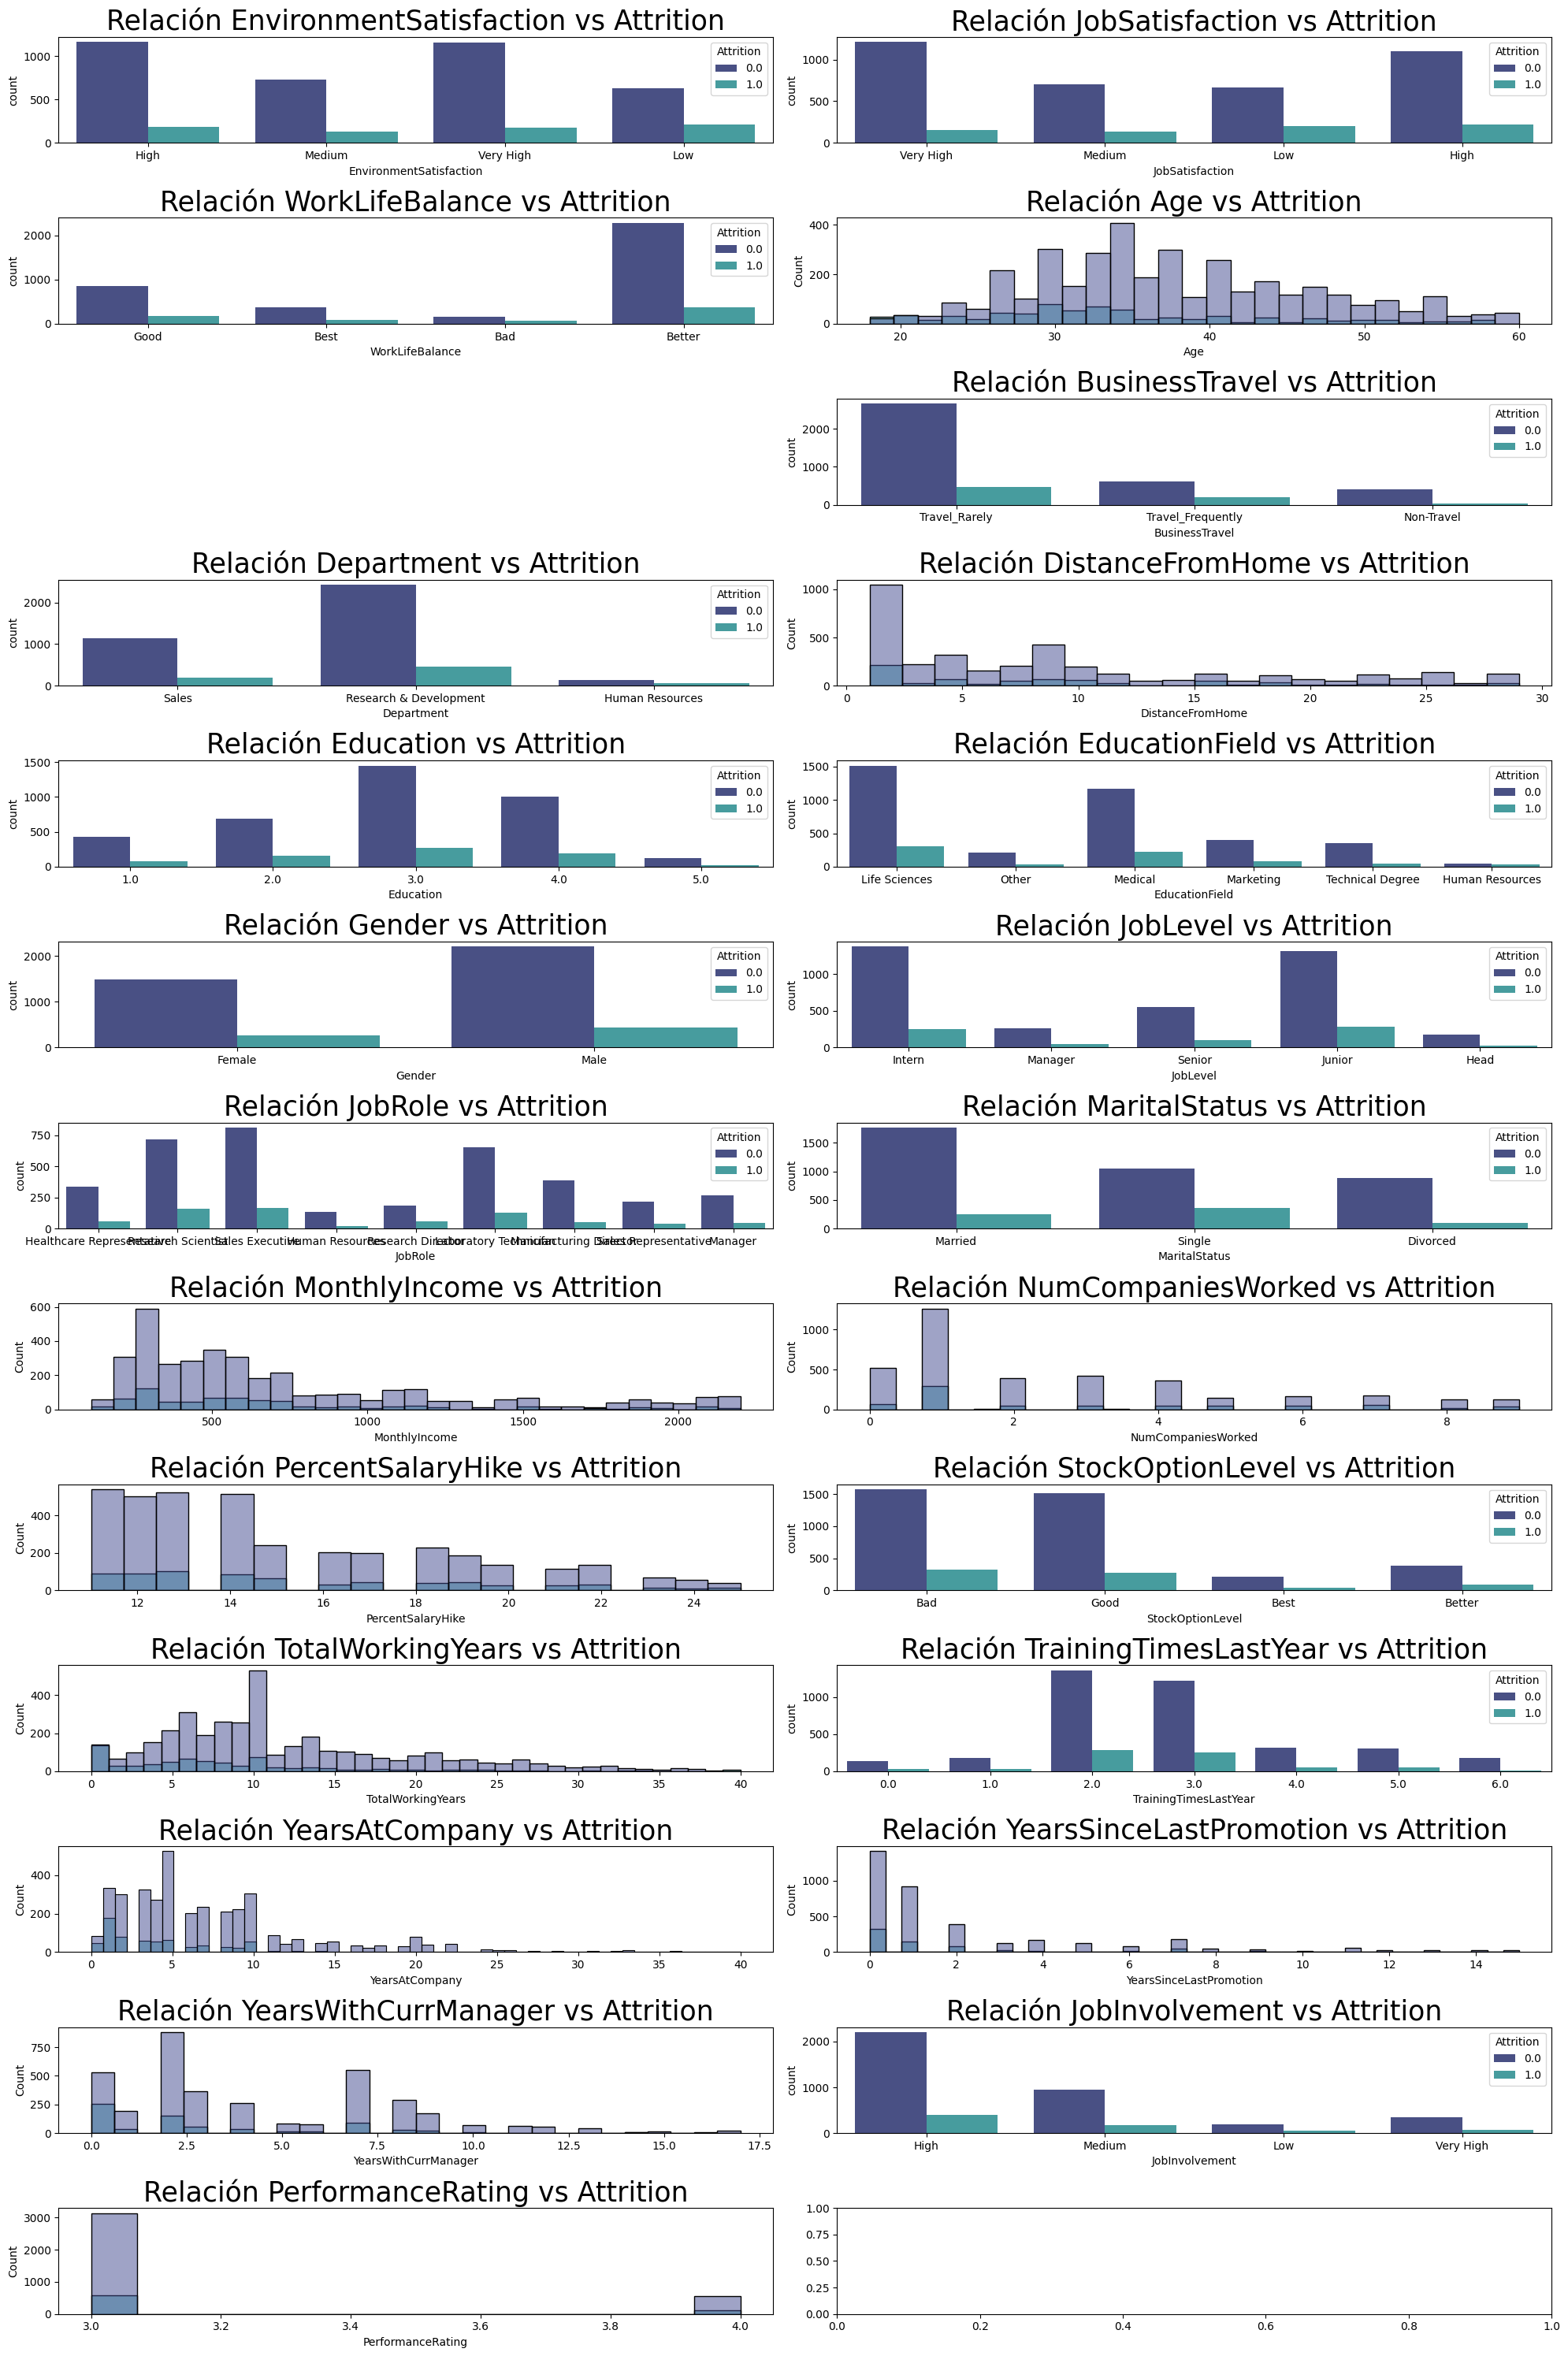

In [132]:
visualizador.plot_relacion("Attrition", tamano_grafica=(20, 30))

Las principales variables relacionadas con un attrition más alto incluyen:

Satisfacción laboral y ambiental (EnvironmentSatisfaction, JobSatisfaction).

Edad: Los empleados más jóvenes muestran mayor attrition.

Viajes de negocios: Viajar con frecuencia puede ser un factor de rotación.

Nivel de ingreso y opciones sobre acciones: Los beneficios económicos influyen significativamente.

Antigüedad en la empresa y con el gerente actual: Los empleados nuevos o con poca relación con su gerente son más propensos a irse.

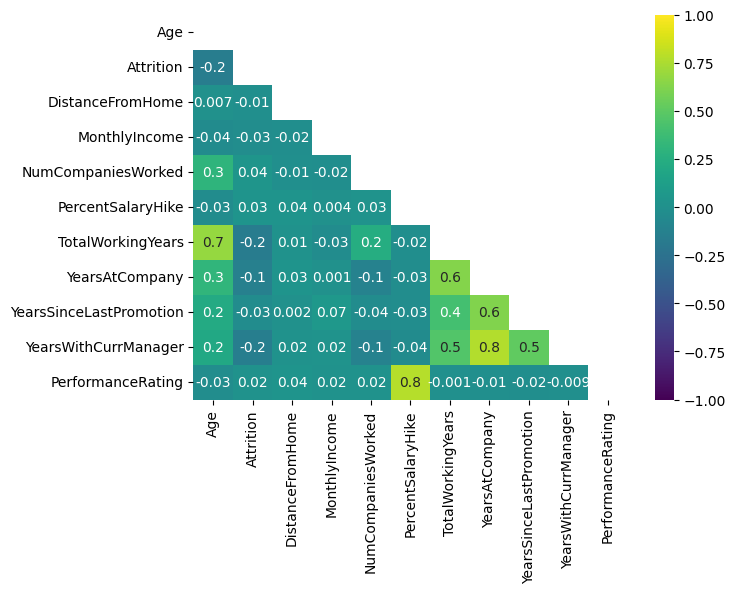

In [133]:
visualizador.correlacion(tamano_grafica = (7, 5))


Tenemos una correlación muy alta entre "PerformanceRating" y "PercentSalaryHike" y entre "YearsAtCompany" y "YearsWithCurrManager"

Eliminamos una de cada pareja.

In [134]:
df.drop(columns=["PerformanceRating","YearsWithCurrManager"], inplace=True)

EDA terminado guardamos el picke con los datos obtenidos

In [135]:
df.to_pickle("../datos/datos_sin_nulos.pkl")